In [66]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline(True)

In [67]:
application_data = pd.read_csv(r'D:\ML Project\application_record.csv')
credit_data = pd.read_csv(r'D:\ML Project\credit_record.csv')

display(application_data.info())
print("\n")
display(credit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


None

In [68]:
display(application_data.head())
print('\n')
display(credit_data.head())

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [69]:
defaults = credit_data[['ID','MONTHS_BALANCE']].groupby('ID').agg(min).reset_index()

display(defaults.head())
print("\n")
display(defaults.info())

ID  MONTHS_BALANCE
0  5001711              -3
1  5001712             -18
2  5001713             -21
3  5001714             -14
4  5001715             -59



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              45985 non-null  int64
 1   MONTHS_BALANCE  45985 non-null  int64
dtypes: int64(2)
memory usage: 718.6 KB


None

In [70]:
drop_index = application_data[application_data.duplicated(subset=['ID'], keep=False)].index

application_unique_data = application_data.drop(drop_index)

application_unique_data.shape

(438463, 18)

In [71]:
data = application_unique_data.merge(defaults, on='ID', how='left')

In [72]:
def risk(x):
    if x >= -3:
        return 'no'
    elif x < -3:
        return 'yes'
    else:
        return 'null'

data['RISK'] = data['MONTHS_BALANCE'].apply(lambda x: risk(x))

In [73]:
data.drop(data[data['RISK'] == 'null'].index, inplace=True)

In [74]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

data['MALE'] = lb.fit_transform(data['CODE_GENDER'])
data['CAR'] = lb.fit_transform(data['FLAG_OWN_CAR'])
data['REALTY'] = lb.fit_transform(data['FLAG_OWN_REALTY'])

data.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'], axis=1, inplace=True)

In [75]:
data['AGE'] = data['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'].apply(lambda x: round(abs(x/365),2))

data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'], axis=1, inplace=True)

In [76]:
data['INCOME'] = data['AMT_INCOME_TOTAL'].apply(lambda x: x/1000)

data.drop(['AMT_INCOME_TOTAL'], axis=1, inplace=True)

In [77]:
pd.set_option('display.max_columns', None)
data.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

  RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0  yes     1    1       1   33           12.44   427.5  
1  yes     1    1       1   33           12.44   427.5  
2  yes     1    1       1   59            3.11   112.5  
3  yes     0    0       1   52            8.36   270.0  
4  yes     0    0       1   52            8.36   270.0

In [78]:
px.box(data_frame=data, x='OCCUPATION_TYPE', y='AGE')

In [79]:
px.box(data_frame=data, x='OCCUPATION_TYPE', y='INCOME')

#Outliers detected in laborers, Security Staff, 

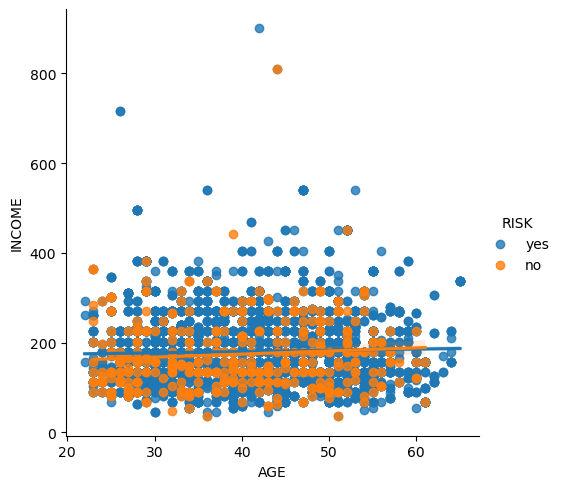

In [80]:
sns.lmplot(data=data[data['OCCUPATION_TYPE']=='Laborers'], x='AGE', y='INCOME', hue='RISK')

#Notice that the salary is increasing with age

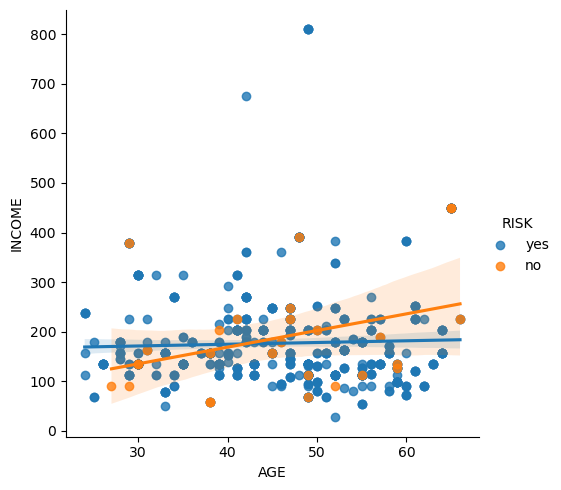

In [81]:
sns.lmplot(data=data[data['OCCUPATION_TYPE']=='Security staff'], x='AGE', y='INCOME', hue='RISK')

#Notice that the salary is increasing with age

In [82]:
data.drop(data.query('OCCUPATION_TYPE=="Laborers" and AGE > 45 and INCOME > 200').index, inplace=True)
#data.drop(data.query('OCCUPATION_TYPE=="Laborers" and AGE > 55').index, inplace=True)
data.drop(data.query('OCCUPATION_TYPE=="Laborers" and INCOME > 400').index, inplace=True)

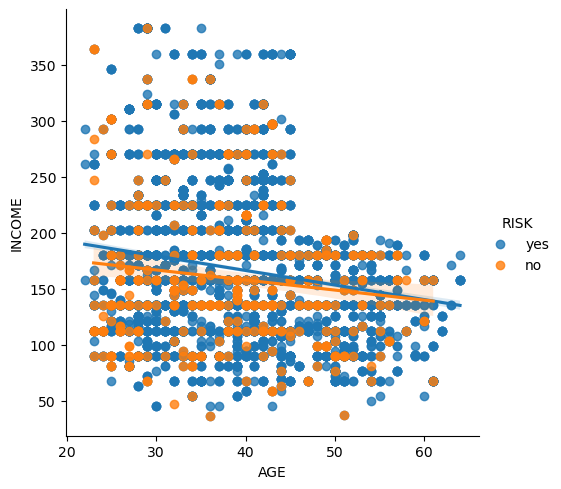

In [83]:
sns.lmplot(data=data[data['OCCUPATION_TYPE']=='Laborers'], x='AGE', y='INCOME', hue='RISK')

In [84]:
data.drop(data.query('OCCUPATION_TYPE=="Security staff" and AGE > 50 and INCOME > 200').index, inplace=True)
#data.drop(data.query('OCCUPATION_TYPE=="Laborers" and AGE > 55').index, inplace=True)
data.drop(data.query('OCCUPATION_TYPE=="Security staff" and INCOME > 400').index, inplace=True)

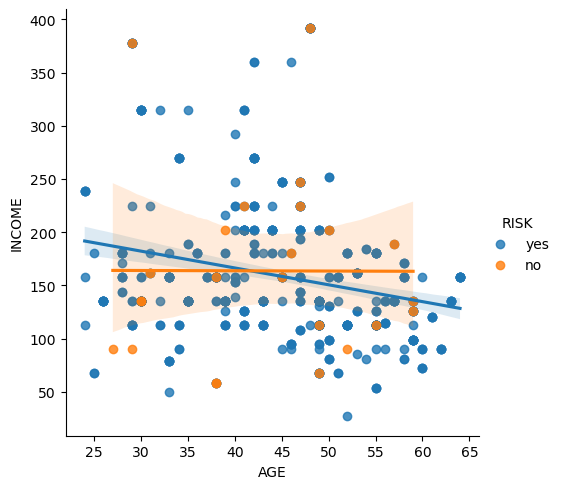

In [85]:
sns.lmplot(data=data[data['OCCUPATION_TYPE']=='Security staff'], x='AGE', y='INCOME', hue='RISK')

In [86]:
data['RISK'] = lb.fit_transform(data['RISK'])

In [87]:
data.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

   RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  
0     1     1    1       1   33           12.44   427.5  
1     1     1    1       1   33           12.44   427.5  
2     1     1    1       1   59            3.11   112.5  
3     1     0    0       1   52            8.36   270.0  
4     1     0    0       1   52            8.36   270.0

In [88]:
display(data['NAME_INCOME_TYPE'].value_counts())

display(data['NAME_EDUCATION_TYPE'].value_counts())

display(data['NAME_FAMILY_STATUS'].value_counts())

display(data['NAME_HOUSING_TYPE'].value_counts())

Working                 18259
Commercial associate     8265
Pensioner                6152
State servant            2951
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    24152
Higher education                  9697
Incomplete higher                 1395
Lower secondary                    362
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 24471
Single / not married     4774
Civil marriage           2838
Separated                2037
Widow                    1518
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      31805
With parents            1761
Municipal apartment     1100
Rented apartment         557
Office apartment         254
Co-op apartment          161
Name: NAME_HOUSING_TYPE, dtype: int64

In [89]:
data['MARRIED'] = data['NAME_FAMILY_STATUS'].apply(lambda x: 1 if ((x == 'Married') or (x == 'Civil marriage')) else 0)

In [90]:
DEGREE = pd.get_dummies(data['NAME_EDUCATION_TYPE'], drop_first=True)
OCCUPATION = pd.get_dummies(data['NAME_INCOME_TYPE'], drop_first=True)
#HOUSE = pd.get_dummies(data['NAME_HOUSING_TYPE'], drop_first=True)

In [91]:
data = pd.concat([data, DEGREE, OCCUPATION], axis=1)

In [92]:
data.head()

ID  CNT_CHILDREN      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0  5008804             0               Working               Higher education   
1  5008805             0               Working               Higher education   
2  5008806             0               Working  Secondary / secondary special   
3  5008808             0  Commercial associate  Secondary / secondary special   
4  5008809             0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  \
0        Civil marriage   Rented apartment           1                1   
1        Civil marriage   Rented apartment           1                1   
2               Married  House / apartment           1                0   
3  Single / not married  House / apartment           1                0   
4  Single / not married  House / apartment           1                0   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0           -15.0   
1           0           0             NaN              2.0           -14.0   
2           0           0  Security staff              2.0           -29.0   
3           1           1     Sales staff              1.0            -4.0   
4           1           1     Sales staff              1.0           -26.0   

   RISK  MALE  CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  MARRIED  \
0     1     1    1       1   33           12.44   427.5        1   
1     1     1    1       1   33           12.44   427.5        1   
2     1     1    1       1   59            3.11   112.5        1   
3     1     0    0       1   52            8.36   270.0        0   
4     1     0    0       1   52            8.36   270.0        0   

   Higher education  Incomplete higher  Lower secondary  \
0                 1                  0                0   
1                 1                  0                0   
2                 0                  0                0   
3                 0                  0                0   
4                 0                  0                0   

   Secondary / secondary special  Pensioner  State servant  Student  Working  
0                              0          0              0        0        1  
1                              0          0              0        0        1  
2                              1          0              0        0        1  
3                              1          0              0        0        0  
4                              1          0              0        0        0

In [93]:
data_occp = data.groupby(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']).size().rename("count").reset_index()

display(data_occp)

NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Commercial associate                Academic degree   
1    Commercial associate                Academic degree   
2    Commercial associate               Higher education   
3    Commercial associate               Higher education   
4    Commercial associate               Higher education   
..                    ...                            ...   
155               Working  Secondary / secondary special   
156               Working  Secondary / secondary special   
157               Working  Secondary / secondary special   
158               Working  Secondary / secondary special   
159               Working  Secondary / secondary special   

          OCCUPATION_TYPE  count  
0                Managers      2  
1             Sales staff     12  
2             Accountants    293  
3          Cleaning staff     11  
4           Cooking staff     14  
..                    ...    ...  
155         Realty agents     21  
156           Sales staff   1726  
157           Secretaries     43  
158        Security staff    300  
159  Waiters/barmen staff     81  

[160 rows x 4 columns]

In [94]:
data_occp_final = data_occp[data_occp.groupby(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'])['count'].transform(max) == data_occp['count']]

data_occp_final

NAME_INCOME_TYPE            NAME_EDUCATION_TYPE OCCUPATION_TYPE  \
1    Commercial associate                Academic degree     Sales staff   
12   Commercial associate               Higher education        Managers   
25   Commercial associate              Incomplete higher        Managers   
33   Commercial associate                Lower secondary        Laborers   
43   Commercial associate  Secondary / secondary special        Laborers   
53              Pensioner               Higher education     Accountants   
54              Pensioner               Higher education      Core staff   
55              Pensioner               Higher education        Laborers   
56              Pensioner               Higher education        Managers   
57              Pensioner               Higher education  Medicine staff   
58              Pensioner  Secondary / secondary special      Core staff   
65          State servant               Higher education      Core staff   
75          State servant              Incomplete higher      Core staff   
82          State servant                Lower secondary  Medicine staff   
86          State servant  Secondary / secondary special      Core staff   
99                Student               Higher education      Core staff   
100               Student  Secondary / secondary special        Laborers   
111               Working               Higher education        Managers   
124               Working              Incomplete higher        Laborers   
137               Working                Lower secondary        Laborers   
150               Working  Secondary / secondary special        Laborers   

     count  
1       12  
12     696  
25      74  
33      16  
43    1016  
53       1  
54       1  
55       1  
56       1  
57       1  
58       4  
65     516  
75      34  
82      12  
86     350  
99       8  
100      2  
111    810  
124    153  
137     54  
150   3282

In [95]:
def fill_occp(values):
    profession = values[0]
    degree = values[1]
    occupation = values[2]
    if pd.isnull(occupation):
        for index,row in data_occp_final.iterrows():
            if ((row['NAME_INCOME_TYPE'] == profession) and (row['NAME_EDUCATION_TYPE'] == degree)):
                return row['OCCUPATION_TYPE']
    else:
        return occupation
            
            
data['OCCUPATION'] = data[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']].apply(fill_occp,axis=1)

In [96]:
OCCUPATION = pd.get_dummies(data['OCCUPATION'], drop_first=True)

OCCUPATION.head()

Cleaning staff  Cooking staff  Core staff  Drivers  HR staff  \
0               0              0           0        0         0   
1               0              0           0        0         0   
2               0              0           0        0         0   
3               0              0           0        0         0   
4               0              0           0        0         0   

   High skill tech staff  IT staff  Laborers  Low-skill Laborers  Managers  \
0                      0         0         0                   0         1   
1                      0         0         0                   0         1   
2                      0         0         0                   0         0   
3                      0         0         0                   0         0   
4                      0         0         0                   0         0   

   Medicine staff  Private service staff  Realty agents  Sales staff  \
0               0                      0              0            0   
1               0                      0              0            0   
2               0                      0              0            0   
3               0                      0              0            1   
4               0                      0              0            1   

   Secretaries  Security staff  Waiters/barmen staff  
0            0               0                     0  
1            0               0                     0  
2            0               1                     0  
3            0               0                     0  
4            0               0                     0

In [97]:
px.box(data_frame=data, x='OCCUPATION_TYPE', y='INCOME')

In [98]:
OCCUPATION['CLASS 3 WORKERS'] = OCCUPATION[['Cleaning staff','Cooking staff','Drivers','Laborers','Low-skill Laborers','Security staff','Waiters/barmen staff']].sum(axis=1)
OCCUPATION['CLASS 2 WORKERS'] = OCCUPATION[['HR staff','Sales staff','Secretaries','Medicine staff','Private service staff']].sum(axis=1)
OCCUPATION['CLASS 1 WORKERS'] = OCCUPATION[['Managers','Core staff','High skill tech staff','IT staff','Realty agents']].sum(axis=1)


OCCUPATION.drop(['Cleaning staff','Cooking staff','Drivers','Laborers','Low-skill Laborers','Security staff','Waiters/barmen staff','HR staff','Sales staff','Secretaries','Medicine staff','Private service staff','Managers','High skill tech staff','IT staff','Realty agents','Core staff'], axis=1,inplace=True)

In [99]:
OCCUPATION.head()

CLASS 3 WORKERS  CLASS 2 WORKERS  CLASS 1 WORKERS
0                0                0                1
1                0                0                1
2                1                0                0
3                0                1                0
4                0                1                0

In [100]:
data = pd.concat([data, OCCUPATION], axis=1)

In [101]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      31805
With parents            1761
Municipal apartment     1100
Rented apartment         557
Office apartment         254
Co-op apartment          161
Name: NAME_HOUSING_TYPE, dtype: int64

In [102]:
data['OWN_HOUSE'] = data['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'House / apartment' else 0)

In [103]:
data.drop(['ID','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','MONTHS_BALANCE','OCCUPATION'], axis=1, inplace=True)

data.rename(columns={'CNT_CHILDREN':'CHILD','FLAG_MOBIL':'MOBIL','FLAG_PHONE':'PHONE','FLAG_EMAIL':'EMAIL','CNT_FAM_MEMBERS':'FAMILY_MEMBERS'}, inplace=True)
data.head()

CHILD  MOBIL  FLAG_WORK_PHONE  PHONE  EMAIL  FAMILY_MEMBERS  RISK  MALE  \
0      0      1                1      0      0             2.0     1     1   
1      0      1                1      0      0             2.0     1     1   
2      0      1                0      0      0             2.0     1     1   
3      0      1                0      1      1             1.0     1     0   
4      0      1                0      1      1             1.0     1     0   

   CAR  REALTY  AGE  YEARS_EMPLOYED  INCOME  MARRIED  Higher education  \
0    1       1   33           12.44   427.5        1                 1   
1    1       1   33           12.44   427.5        1                 1   
2    1       1   59            3.11   112.5        1                 0   
3    0       1   52            8.36   270.0        0                 0   
4    0       1   52            8.36   270.0        0                 0   

   Incomplete higher  Lower secondary  Secondary / secondary special  \
0                  0                0                              0   
1                  0                0                              0   
2                  0                0                              1   
3                  0                0                              1   
4                  0                0                              1   

   Pensioner  State servant  Student  Working  CLASS 3 WORKERS  \
0          0              0        0        1                0   
1          0              0        0        1                0   
2          0              0        0        1                1   
3          0              0        0        0                0   
4          0              0        0        0                0   

   CLASS 2 WORKERS  CLASS 1 WORKERS  OWN_HOUSE  
0                0                1          0  
1                0                1          0  
2                0                0          1  
3                1                0          1  
4                1                0          1

In [104]:
from imblearn.over_sampling import SMOTE


In [105]:
X = data.drop('RISK', axis=1)
y = data['RISK']
oversample = SMOTE()
X_bal,y_bal = oversample.fit_resample(X, y)
X_bal = pd.DataFrame(X_bal, columns=X.columns)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal,stratify = y_bal,test_size=0.3, random_state=123)

In [107]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

print("Train Acc")
print(logReg.score(X_train, y_train))
print("\nTest Acc")
print(logReg.score(X_test, y_test))

print("\nAUC")
print(roc_auc_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Acc
0.7831369110003636

Test Acc
0.7798073563906772

AUC
0.7798096174664823
[[7359 2660]
 [1752 8266]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     10019
           1       0.76      0.83      0.79     10018

    accuracy                           0.78     20037
   macro avg       0.78      0.78      0.78     20037
weighted avg       0.78      0.78      0.78     20037



In [109]:
import xgboost as xgb

gbm = xgb.XGBClassifier()



In [110]:
gbm.fit(X_train, y_train)
train_score = gbm.score(X_train, y_train)
test_score = gbm.score(X_train, y_train)

print(train_score)
print(test_score)

0.9184223472290548
0.9184223472290548


In [111]:

X_train = X_train.values

y_train = y_train.values


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [113]:
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_train, y_train)

print(train_score)
print(test_score)

0.9056745021709837
0.9056745021709837


In [114]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_train, y_train)

print(train_score)
print(test_score)

0.9515752999807499
0.9515752999807499
